In [1]:
from skimage import io
import skimage
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from scipy import ndimage
import scipy.misc
from skimage import data, io
from skimage.color import rgb2hsv

import matplotlib.pyplot as plt
import numpy as np


# Preprocess Data

In [3]:
def calc_stats(filename):
    image = io.imread(filename)
    shape_val = image.shape
    
    width = shape_val[1]
    height = shape_val[0]
    
    hsv_img = rgb2hsv(image)
    
    hue_img = hsv_img[:, :, 0]
    hue_avg = np.mean(hue_img, axis=(0,1))
    
    saturation_img = hsv_img[:,:, 1]
    saturation_avg = np.mean(saturation_img, axis=(0,1))
    
    value_img = hsv_img[:, :, 2]
    value_avg = np.mean(value_img, axis=(0,1))
    
    resolution = width*height
    
    image_stats = [filename ,width, height, hue_avg, saturation_avg, value_avg, resolution]
    return image_stats

def calc_edge(image):
    rgb_img = image
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    sobel_x = ndimage.sobel(value_img, axis=1, mode='constant')
    sobel_y = ndimage.sobel(value_img, axis=0, mode='constant')
    landscape_edge_image = np.hypot(sobel_x, sobel_y)
#     fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

#     ax0.imshow(image)
#     ax0.set_title("Painting")
#     ax0.axis('off')
#     ax1.imshow(landscape_edge_image, cmap='gray')
#     ax1.set_title("Edge (Magnitude of X-Y Sobel)")
#     ax1.axis('off')
#     ax2.imshow(sobel_x, cmap='gray')
#     ax2.set_title("X Sobel")
#     ax2.axis('off')
#     ax3.imshow(sobel_y, cmap='gray')
#     ax3.set_title("Y Sobel")
#     ax3.axis('off')
    return landscape_edge_image.mean()
    #return fig.tight_layout()


def calcDGenergy(img):
    # from from https://stackoverflow.com/a/48974892

    #convert from uint8 to int64 to prevent overflow problems
    arr = np.array(img, dtype = int)

    #calculate squared difference ((x-1, y) - (x+1, y))^2 for each R, G and B pixel
    deltaX2 = np.square(np.roll(arr, -1, axis = 0) - np.roll(arr, 1, axis = 0))

    #same for y axis
    deltaY2 = np.square(np.roll(arr, -1, axis = 1) - np.roll(arr, 1, axis = 1))

    #add R, G and B values for each pixel, then add x- and y-shifted values
    dualEnergy = np.sum(deltaX2, axis = 2) + np.sum(deltaY2, axis = 2)
    return dualEnergy

def image_energy(image):
    dgEnergy = calcDGenergy(image)
    mean = dgEnergy.mean()
    return mean

# print stats

In [4]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/fantasy'):
    for imagename in image_list:
        stat_list.append(calc_stats(path+'/'+imagename))
fantasy_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

stat_list = []
for path, idk, image_list in os.walk("./data/posters/fantasy"):
    for imagename in image_list:
        stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
fantasy_stats['edge'] = stat_list

stat_list = []
for path, idk, image_list in os.walk("./data/posters/fantasy"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            stat_list.append(-1)
            continue
fantasy_stats['energy'] = stat_list

In [5]:
fantasy_stats.head()

,filename,width,height,mean hue,mean saturation,mean value,resolution,edge,energy
0,./data/posters/fantasy/109356.jpg,182,268,0.539367,0.522402,0.380489,48776,0.588885,11122.573766
1,./data/posters/fantasy/110527.jpg,182,268,0.618039,0.372522,0.416437,48776,0.299823,4651.511030
2,./data/posters/fantasy/110148.jpg,182,268,0.114299,0.524769,0.330444,48776,0.364130,6597.940750
3,./data/posters/fantasy/82198.jpg,182,268,0.320213,0.412915,0.214963,48776,0.578825,15754.543751
4,./data/posters/fantasy/119784.jpg,182,268,0.562902,0.606115,0.268397,48776,0.568992,9604.701534


In [6]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/drama'):
    for imagename in image_list:
        try:
            stat_list.append(calc_stats(path+'/'+imagename))
        except:
            continue
drama_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

stat_list = []
for path, idk, image_list in os.walk("./data/posters/drama"):
    for imagename in image_list:
        try:
            stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
        except:
            continue
drama_stats['edge'] = stat_list

stat_list = []
for path, idk, image_list in os.walk("./data/posters/drama"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            continue
drama_stats['energy'] = stat_list

In [7]:
drama_stats.head()

,filename,width,height,mean hue,mean saturation,mean value,resolution,edge,energy
0,./data/posters/drama/108026.jpg,182,268,0.581992,0.470580,0.468220,48776,0.618608,13153.142242
1,./data/posters/drama/115886.jpg,182,268,0.495018,0.588504,0.592716,48776,0.606966,11925.503362
2,./data/posters/drama/120789.jpg,182,268,0.228594,0.091381,0.917267,48776,0.287550,4732.300804
3,./data/posters/drama/169145.jpg,182,268,0.226814,0.654135,0.424770,48776,0.636174,10792.161268
4,./data/posters/drama/103859.jpg,182,268,0.457802,0.327334,0.427163,48776,0.448646,11728.687059


In [8]:
drama_stats.shape

(1995, 9)

In [9]:
fantasy_stats.to_csv('fantasy.csv')

In [10]:
drama_stats.to_csv('drama.csv')

In [11]:
fantasy_stats['y']= [2]*len(fantasy_stats)

In [12]:
drama_stats['y']= [3]*len(drama_stats)

In [13]:
fantasy_drama_df = pd.concat([fantasy_stats, drama_stats])

In [14]:
fantasy_drama_df = fantasy_drama_df.drop('resolution', axis=1)

In [15]:
fantasy_drama_df.to_csv('fantasy_drama_df.csv')

# Display Results For Fantasy Movies

In [16]:
%matplotlib inline

In [17]:
from matplotlib import pyplot as plt

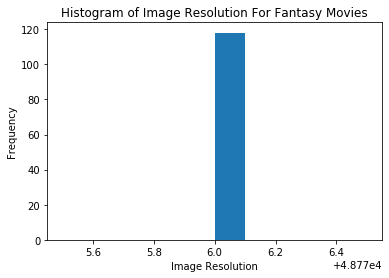

In [18]:
fantasy_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Fantasy Movies')
plt.xlabel('Image Resolution')
plt.show()

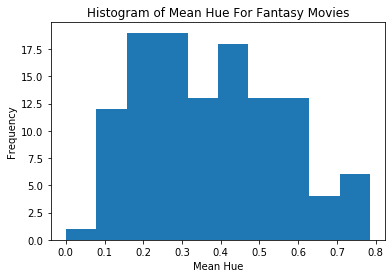

In [19]:
fantasy_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Fantasy Movies')
plt.xlabel('Mean Hue')
plt.show()

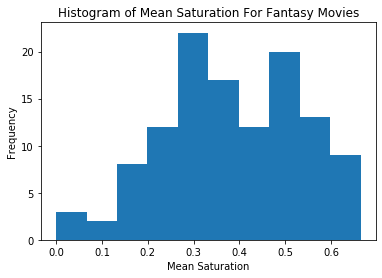

In [20]:
fantasy_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Fantasy Movies')
plt.xlabel('Mean Saturation')
plt.show()

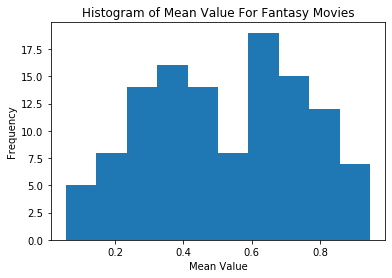

In [21]:
fantasy_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Fantasy Movies')
plt.xlabel('Mean Value')
plt.show()

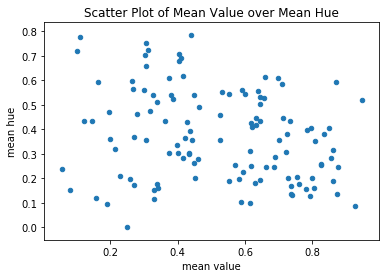

In [22]:
fantasy_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

# Display Results For Drama Movies

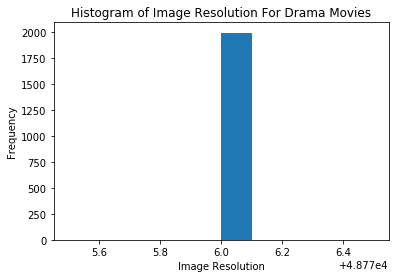

In [23]:
drama_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Drama Movies')
plt.xlabel('Image Resolution')
plt.show()

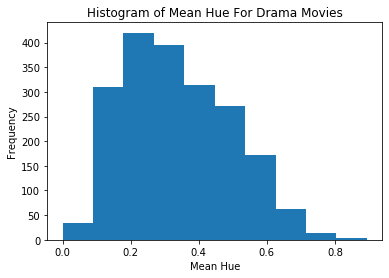

In [24]:
drama_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Drama Movies')
plt.xlabel('Mean Hue')
plt.show()

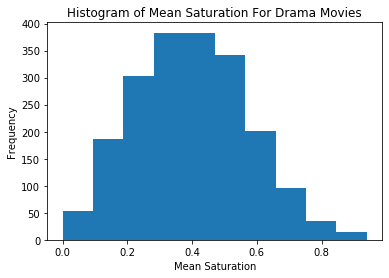

In [25]:
drama_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Drama Movies')
plt.xlabel('Mean Saturation')
plt.show()

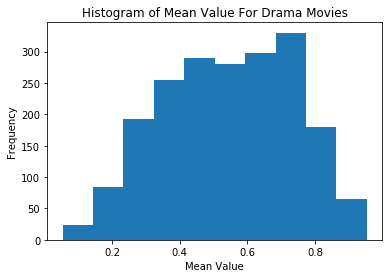

In [26]:
drama_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Drama Movies')
plt.xlabel('Mean Value')
plt.show()

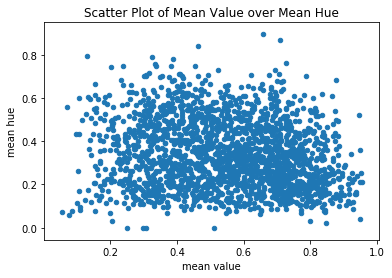

In [27]:
drama_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

# Make Thumbnails And Plot Results

In [109]:
def make_thumbnail(filename, imagepath, thumbnailpath):
    image = Image.open(imagepath+'/'+filename)
    size = 128, 128
    image.thumbnail(size)
    image.save(thumbnailpath+'/'+filename)

In [110]:
if not os.path.exists('./data/posters/fantasy-thumbnails'):
    os.makedirs('./data/posters/fantasy-thumbnails')

In [111]:
for path, idk, image_list in os.walk('./data/posters/fantasy'):
    for imagename in image_list:
        make_thumbnail(imagename, './data/posters/fantasy', 'data/posters/fantasy-thumbnails')

In [28]:
if not os.path.exists('results'):
    os.makedirs('results')

In [29]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/fantasy-thumbnails'):
    for imagename in image_list:
        stat_list.append(calc_stats(path+'/'+imagename))
thumbs_fantasy_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

stat_list = []
for path, idk, image_list in os.walk("./data/posters/fantasy-thumbnails"):
    for imagename in image_list:
        stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
thumbs_fantasy_stats['edge'] = stat_list

stat_list = []
for path, idk, image_list in os.walk("./data/posters/fantasy-thumbnails"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            stat_list.append(-1)
            continue
thumbs_fantasy_stats['energy'] = stat_list

# Bitmap for mean value vs saturation for fantasy posters

Text(0.5, 1.0, 'Mean Value VS Mean Saturation')

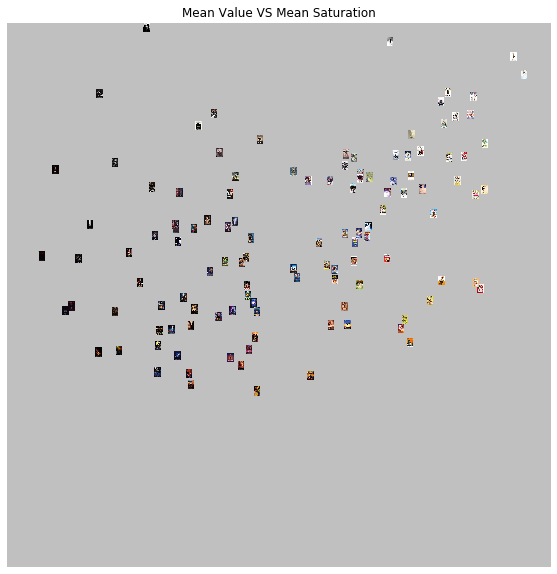

In [30]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_fantasy_stats[['mean value','mean saturation']].values]
image_list = thumbs_fantasy_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/fantasy-bitmap-value-vs-saturation.jpg")
        
image = plt.imread("results/fantasy-bitmap-value-vs-saturation.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Saturation")

We see a general trend going from the bottom left to the top right

# Bitmap for mean value us mean hue for fantasy posters 

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

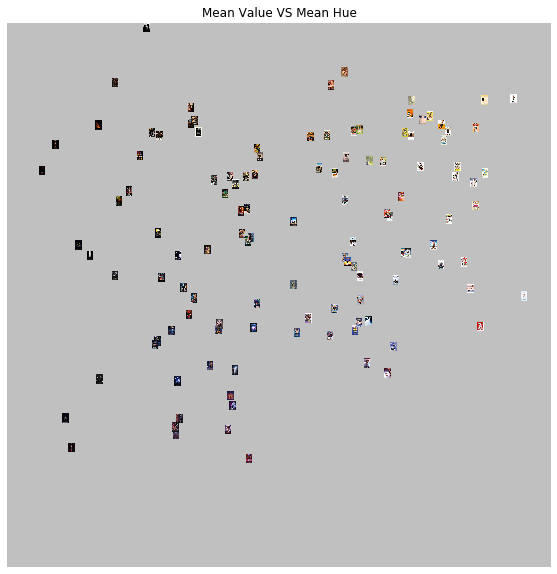

In [31]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_fantasy_stats[['mean value','mean hue']].values]
image_list = thumbs_fantasy_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/fantasy-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/fantasy-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")

We see a general trend going from the bottom left to the top right.

# Bitmap for mean value us mean edges for fantasy posters

Text(0.5, 1.0, 'Mean Value VS Mean edge')

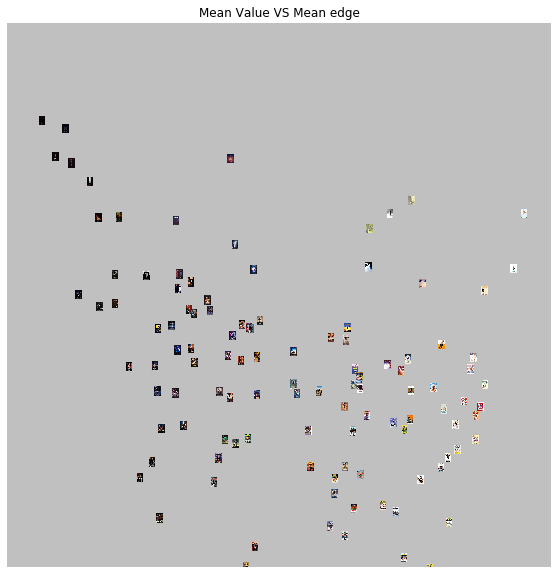

In [32]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_fantasy_stats[['mean value','edge']].values]
image_list = thumbs_fantasy_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/fantasy-bitmap-value-vs-edge.jpg")
        
image = plt.imread("results/fantasy-bitmap-value-vs-edge.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean edge")

We see a general trend going from the top left to the bottom right.

In [145]:
if not os.path.exists('./data/posters/drama-thumbnails'):
    os.makedirs('./data/posters/drama-thumbnails')

In [146]:
idx = 0
for path, idk, image_list in os.walk('./data/posters/drama'):
    for imagename in image_list:
        make_thumbnail(imagename, './data/posters/drama', 'data/posters/drama-thumbnails')

In [33]:
stat_list = []
for path, idk, image_list in os.walk('./data/posters/drama-thumbnails'):
    for imagename in image_list:
        try:
            stat_list.append(calc_stats(path+'/'+imagename))
        except:
            continue
thumbs_drama_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

stat_list = []
for path, idk, image_list in os.walk("./data/posters/drama-thumbnails"):
    for imagename in image_list:
        try:
            stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
        except:
            continue
thumbs_drama_stats['edge'] = stat_list

stat_list = []
for path, idk, image_list in os.walk("./data/posters/drama-thumbnails"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            continue
thumbs_drama_stats['energy'] = stat_list

In [34]:
thumbs_drama_stats.head()

,filename,width,height,mean hue,mean saturation,mean value,resolution,edge,energy
0,./data/posters/drama-thumbnails/115760.jpg,87,128,0.178638,0.695703,0.588357,11136,0.936845,22157.878053
1,./data/posters/drama-thumbnails/104765.jpg,87,128,0.495343,0.139628,0.795795,11136,0.590856,10290.056932
2,./data/posters/drama-thumbnails/107211.jpg,87,128,0.467592,0.567058,0.341992,11136,0.504516,10458.863506
3,./data/posters/drama-thumbnails/120594.jpg,87,128,0.308657,0.521487,0.505976,11136,0.714870,15721.195941
4,./data/posters/drama-thumbnails/89604.jpg,87,128,0.282737,0.424143,0.378873,11136,0.913205,18748.502155


# Bitmap for mean value us saturation for drama posters

Text(0.5, 1.0, 'Mean Value VS Mean Saturation')

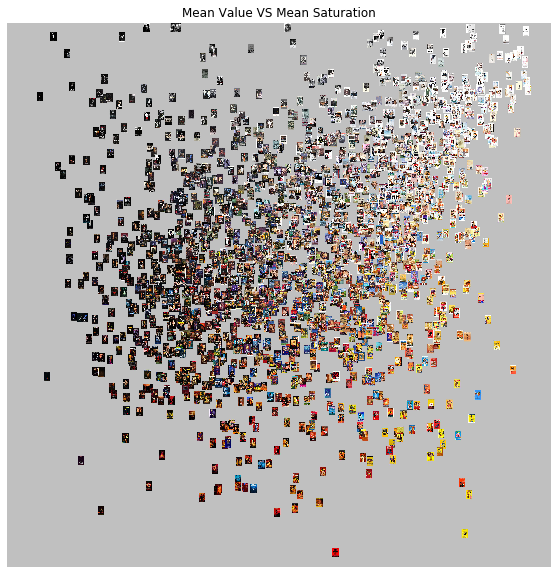

In [35]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_drama_stats[['mean value','mean saturation']].values]
image_list = thumbs_drama_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/drama-bitmap-value-vs-saturation.jpg")
        
image = plt.imread("results/drama-bitmap-value-vs-saturation.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Saturation")

We see a general trend going from the bottom left to the top right.

# Bitmap for mean value us mean hue for drama posters 

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

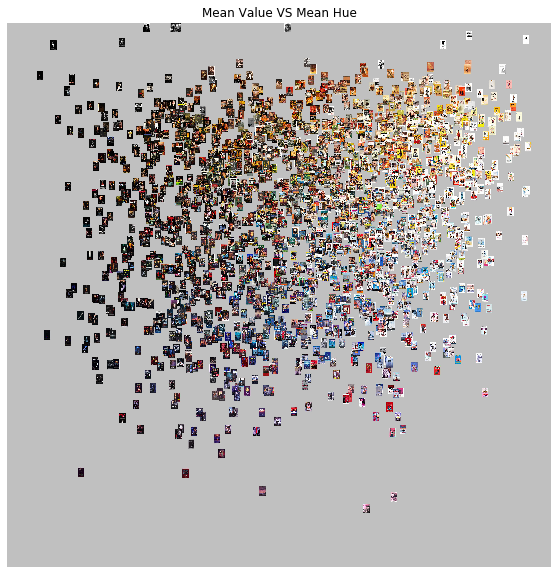

In [36]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_drama_stats[['mean value','mean hue']].values]
image_list = thumbs_drama_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/drama-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/drama-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")

We see a general trend going from the bottom left to the top right.

Text(0.5, 1.0, 'Mean Value VS Mean Edge')

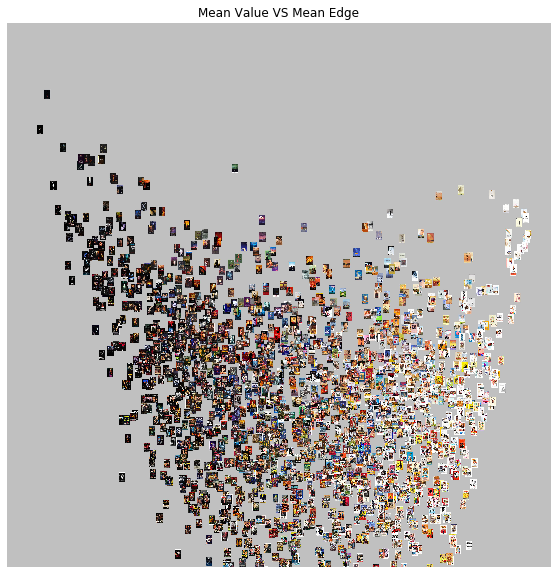

In [38]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_drama_stats[['mean value','edge']].values]
image_list = thumbs_drama_stats['filename']
for image_idx in range(len(image_list)):
    thumb_img = Image.open(image_list[image_idx])
    figure.paste(thumb_img, coords[image_idx])

figure.save("results/drama-bitmap-value-vs-edge.jpg")
        
image = plt.imread("results/drama-bitmap-value-vs-edge.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Edge")

We see a general trend going from the top left to the bottom right.

# Conclusion

The bitmaps for all the genres look really similar. Hence, creating a classification model with these features is going to be hard.